In [1]:
from urllib.request import urlopen
import json
import requests
import pandas as pd
#from selenium import webdriver
from bs4 import BeautifulSoup as bs
import plotly.graph_objects as go


In [2]:
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/russia.geojson') as response:
    counties = json.load(response)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('project4.csv', delimiter=';')
df

,ProductName,CreditSum,TypeOfWork,Employment,sex,age,EducationStatus,otrasl_rabotodatelya,kolichestvo_rabotnikov_v_organizacii,OrgStanding_N,kolichestvo_detej_mladshe_18,LivingRegionName,geo_lat,geo_lon,Residence,IncomeDocumentKind,HaveSalaryCard,IsBankWorker,harakteristika_tekutschego_trudoustrojstva,ConfirmedMonthlyIncome
0,Credit_potreb,500000.0,NaN,worker,Female,49,Higher_education,Other,Above_500,"1,25",0,Samara,53.195031,50.106952,city,Account_statement,0,1,Full_employment,30691
1,Credit_potreb,708000.0,NaN,Middle_Management,Female,44,Secondary_special_education,civil_service,Under_20,"20,00",0,Kazan,55.794358,49.111497,village,Account_statement,1,0,Full_employment,25712
2,Credit_potreb,665000.0,NaN,worker,Male,29,Higher_education,Other,101_500,"2,00",1,Kazan,55.794358,49.111497,city,Account_statement,1,0,Full_employment,31081
3,Credit_potreb,458000.0,NaN,worker,Female,59,Several_higher_education,Education,21_100,"23,00",0,Zelenodolsk,55.846665,48.501095,village,2-NDFL,1,0,Full_employment,17849
4,Credit_potreb,969000.0,NaN,worker,Male,51,Higher_education,Health_care,Above_500,"9,25",2,Tumen,57.152974,65.534410,city,2-NDFL,0,0,Full_employment,115381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,Credit_potreb,500000.0,Employee,worker,Male,40,Higher_education,Other,Under_20,"17,00",3,Kazan,55.794358,49.111497,village,Account_statement,1,0,Full_employment,89781
10715,Credit_potreb,105000.0,NaN,worker,Female,44,Higher_education,Education,21_100,"9,00",0,Nab_Chelny,55.743462,52.395916,city,Account_statement,1,0,Full_employment,43481
10716,Credit_potreb,600000.0,NaN,worker,Male,34,Higher_education,Ministry_of_Defence,Above_500,"9,00",1,Kazan,55.794358,49.111497,city,2-NDFL,0,0,Full_employment,64862
10717,Credit_potreb,376250.0,Employee,worker,Male,26,Incomplete_higher_education,Gas_oil,Above_500,"0,50",0,Almetevsk,54.901462,52.297047,city,2-NDFL,0,0,Full_employment,31326


In [6]:
df_Employment = df.groupby(['Employment']).mean('ConfirmedMonthlyIncome')
df_Employment.sort_values(by='ConfirmedMonthlyIncome', ascending=False)

,CreditSum,age,kolichestvo_detej_mladshe_18,geo_lat,geo_lon,HaveSalaryCard,IsBankWorker,ConfirmedMonthlyIncome
Employment,,,,,,,,
Individual,183333.333333,44.000000,1.333333,55.622474,46.881633,0.000000,0.000000,117722.333333
TOP_Management,578788.402655,43.082474,0.787923,55.548476,51.206111,0.396171,0.076583,72691.385862
Middle_Management,468245.755391,40.179187,0.785714,55.574021,50.932530,0.403941,0.168103,55033.605911
senior_worker,408059.060213,37.720189,0.617473,55.841042,50.985113,0.363636,0.191263,43545.978749
worker,362224.237654,38.483128,0.568877,55.544575,51.332519,0.353447,0.067752,33595.423713


In [30]:
df_EducationStatus = df.groupby(['EducationStatus']).mean('ConfirmedMonthlyIncome')
df_EducationStatus.sort_values(by='ConfirmedMonthlyIncome', ascending=False)

,CreditSum,age,kolichestvo_detej_mladshe_18,geo_lat,geo_lon,HaveSalaryCard,IsBankWorker,ConfirmedMonthlyIncome
EducationStatus,,,,,,,,
Science_degree,465530.416667,44.666667,0.583333,55.859303,47.398926,0.250000,0.000000,74574.083333
Several_higher_education,485458.725000,39.670000,0.785000,55.667692,50.615038,0.365000,0.180000,57738.750000
Higher_education,425899.716361,38.239927,0.714156,55.591926,51.130732,0.398730,0.156624,46583.847368
Incomplete_higher_education,308722.420253,29.369620,0.420253,55.549475,51.595349,0.248101,0.073418,34624.936709
Secondary_special_education,368488.393690,40.421262,0.523595,55.548397,51.283075,0.338547,0.017762,32450.727731
Secondary_education,336262.902639,41.833953,0.486989,55.544853,51.766089,0.315985,0.004957,30475.118959
Incomplete_secondary_education,338534.130435,31.739130,0.391304,55.843155,52.091416,0.130435,0.000000,27909.521739


In [32]:
df_otrasl_rabotodatelya = df.groupby(['otrasl_rabotodatelya']).mean('ConfirmedMonthlyIncome')
df_otrasl_rabotodatelya.sort_values(by='ConfirmedMonthlyIncome', ascending=False)

,CreditSum,age,kolichestvo_detej_mladshe_18,geo_lat,geo_lon,HaveSalaryCard,IsBankWorker,ConfirmedMonthlyIncome
otrasl_rabotodatelya,,,,,,,,
legal_services,451342.235294,38.058824,0.823529,55.798483,56.301521,0.117647,0.000000,69918.647059
IT,484056.556818,34.170455,0.579545,55.826549,49.304358,0.465909,0.034091,55645.545455
Real_estate,515238.575758,37.606061,0.696970,56.042069,48.825389,0.242424,0.000000,54595.969697
Electric_power,476594.718367,38.159184,0.795918,55.765320,50.317852,0.600000,0.000000,51795.824490
Gas_oil,482267.225197,37.318110,0.833071,55.081604,52.716168,0.022047,0.000000,50294.154331
Architecture,469796.247040,37.191336,0.635379,55.510655,51.560072,0.350181,0.000000,46520.649819
logistics,483408.682927,35.317073,0.829268,56.112133,49.506803,0.170732,0.000000,46110.243902
Science,577106.166667,43.833333,0.250000,59.125118,33.932179,0.333333,0.000000,45693.333333
Financial_institutions,242759.708253,34.368522,0.619962,55.577504,50.990191,0.023992,0.902111,45643.568138


In [33]:
df_sex = df.groupby(['sex']).mean('ConfirmedMonthlyIncome')
df_sex.sort_values(by='ConfirmedMonthlyIncome', ascending=False)

,CreditSum,age,kolichestvo_detej_mladshe_18,geo_lat,geo_lon,HaveSalaryCard,IsBankWorker,ConfirmedMonthlyIncome
sex,,,,,,,,
Male,434518.681504,37.370596,0.723663,55.562958,51.328672,0.316401,0.034520,44925.082454
Female,353164.123106,40.716264,0.506240,55.585521,51.138218,0.416732,0.157176,34957.066498


In [7]:
import numpy as np

import pandas as pd
# наши основные библиотеки для визуализаций
from matplotlib import pyplot as plt
import seaborn as sns
# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline
sns.set (color_codes = True)
# %matplotlib qt
# магическая функция, чтобы графики отображались в отдельном окне
#%matplotlib notebook

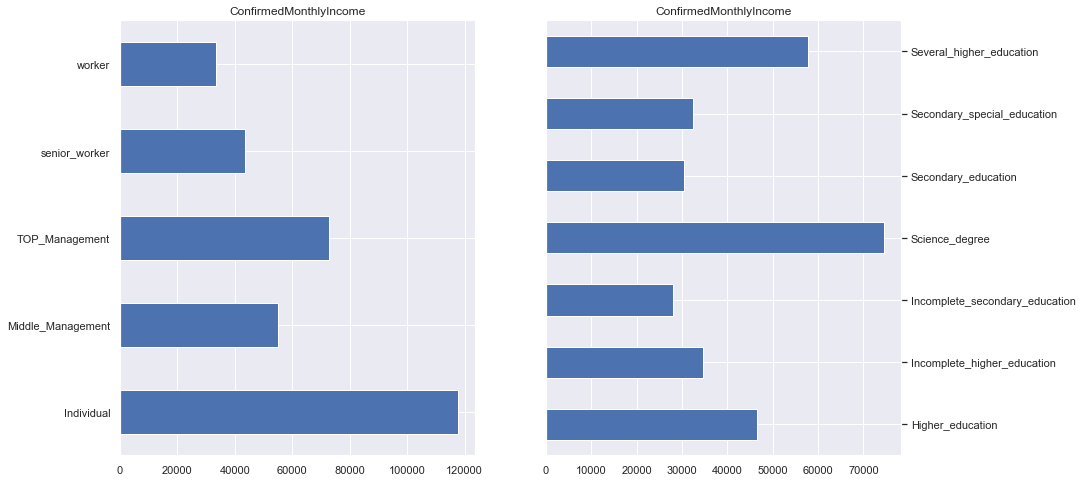

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

df_Employment['ConfirmedMonthlyIncome'].plot(kind='barh', ax=ax[0])
ax[0].set_title('ConfirmedMonthlyIncome')

df_EducationStatus['ConfirmedMonthlyIncome'].plot(kind='barh', ax=ax[1])
ax[1].set_title('ConfirmedMonthlyIncome')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False)

In [8]:
df_LivingRegionName = df.groupby(['LivingRegionName']).mean('ConfirmedMonthlyIncome')
df_LivingRegionName.sort_values(by='ConfirmedMonthlyIncome', ascending=False)


,CreditSum,age,kolichestvo_detej_mladshe_18,geo_lat,geo_lon,HaveSalaryCard,IsBankWorker,ConfirmedMonthlyIncome
LivingRegionName,,,,,,,,
Moscow,616901.500000,38.800000,0.462500,55.754047,37.620405,0.012500,0.225000,86965.900000
Yaroslavl,538961.166667,39.166667,1.416667,57.621548,39.897741,0.000000,0.500000,78642.583333
Saint_Petersburg,571169.568807,38.747706,0.536697,59.939131,30.315900,0.077982,0.091743,64056.385321
Krasnodar,503516.978261,38.000000,0.478261,45.040160,38.975965,0.021739,0.195652,57555.804348
Krasnoyarsk,489727.729167,37.756944,0.368056,56.009388,92.852481,0.125000,0.111111,52647.854167
Tumen,458147.178571,38.464286,0.726190,57.152974,65.534410,0.083333,0.059524,51745.750000
Novosibirsk,407946.555556,37.200000,0.466667,55.028191,82.921149,0.044444,0.155556,51431.600000
Ekaterinburg,486465.197368,38.776316,0.592105,56.838522,60.605491,0.000000,0.078947,51305.157895
Barnaul,375752.200000,35.800000,0.700000,53.347997,83.779806,0.040000,0.080000,48491.160000


In [10]:
def to_int_size(value):
    try:
        return np.log2(int(value))
    except:
        return np.log2(int(value.split('[')[0]))

fig = go.Figure(go.Scattermapbox(lat=df['geo_lat'], 
                                 lon=df['geo_lon'], 
                                 text=df['LivingRegionName'],
                                 marker=dict(colorbar=dict(title="Месячный доход"),
                                             color=df_LivingRegionName['ConfirmedMonthlyIncome'],
                                             size=df_LivingRegionName['CreditSum'].map(to_int_size))))
map_center = go.layout.mapbox.Center(lat=(df['geo_lat'].max()+df['geo_lat'].min())/2, 
                                     lon=(df['geo_lon'].max()+df['geo_lon'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=3))
fig.show()

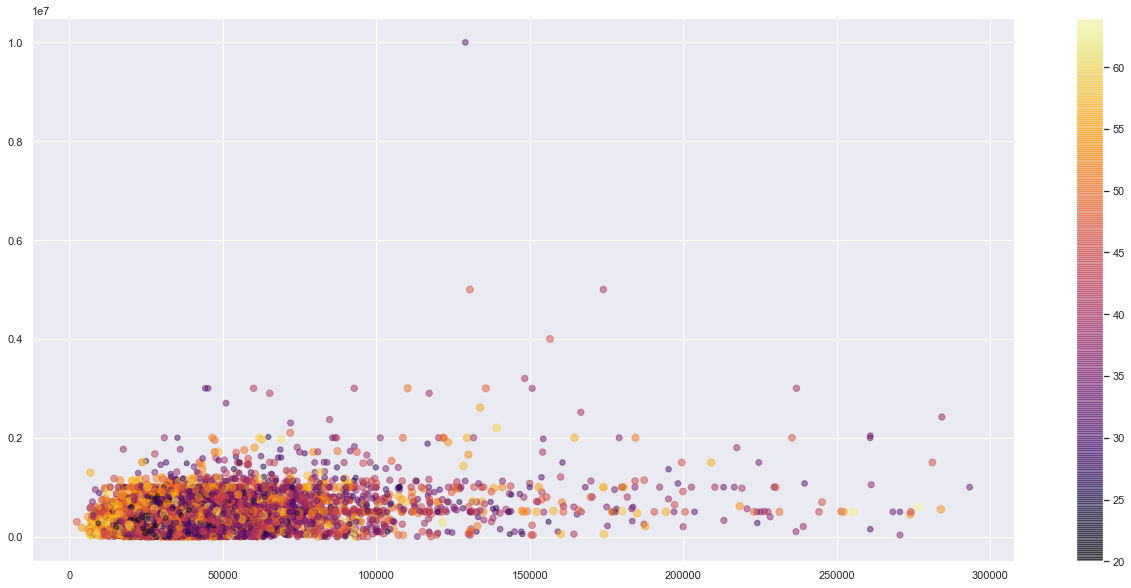

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline
sns.set (color_codes = True) 
# %matplotlib qt
# магическая функция, чтобы графики отображались в отдельном окне
#%matplotlib notebook

fig, ax = plt.subplots(figsize = (22,10))
color_graph=ax.scatter(df['ConfirmedMonthlyIncome'], df['CreditSum'], s = df['age'], alpha = 0.5, cmap = 'inferno',
           c = df['age'])
plt.colorbar(color_graph)

In [17]:
print(df.shape) 
print(df.info())

(10719, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ProductName                                 10719 non-null  object 
 1   CreditSum                                   10713 non-null  float64
 2   TypeOfWork                                  6152 non-null   object 
 3   Employment                                  10710 non-null  object 
 4   sex                                         10719 non-null  object 
 5   age                                         10719 non-null  int64  
 6   EducationStatus                             10719 non-null  object 
 7   otrasl_rabotodatelya                        10718 non-null  object 
 8   kolichestvo_rabotnikov_v_organizacii        10718 non-null  object 
 9   OrgStanding_N                               10719 non-null  object 
 10

In [18]:
df_mean = df.mean()
df.fillna(df_mean, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ProductName                                 10719 non-null  object 
 1   CreditSum                                   10719 non-null  float64
 2   TypeOfWork                                  6152 non-null   object 
 3   Employment                                  10710 non-null  object 
 4   sex                                         10719 non-null  object 
 5   age                                         10719 non-null  int64  
 6   EducationStatus                             10719 non-null  object 
 7   otrasl_rabotodatelya                        10718 non-null  object 
 8   kolichestvo_rabotnikov_v_organizacii        10718 non-null  object 
 9   OrgStanding_N                               10719 non-null  object 
 10  kolichestv

In [20]:
from sklearn import linear_model
logistic_regression_model = linear_model.LogisticRegression() # создаем модель
logistic_regression_model # смотрим, что получилось

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
from sklearn import ensemble
random_forest_model = ensemble.RandomForestRegressor(n_estimators=1000)
random_forest_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

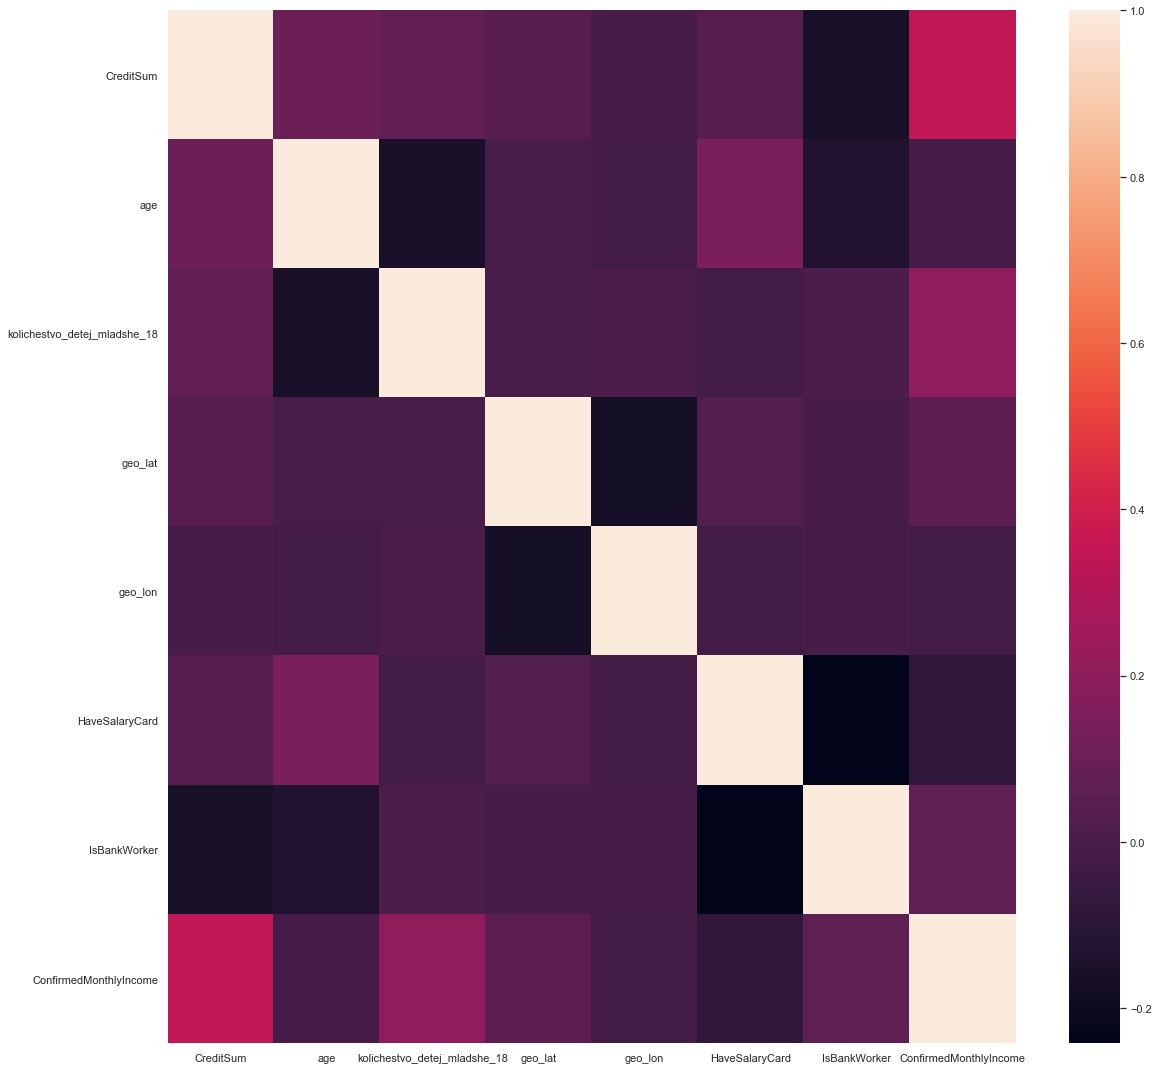

In [22]:
plt.figure(figsize=(19,19))
sns.heatmap(df.corr())

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [24]:
text_features = ['ProductName', 'TypeOfWork', 
                 'Employment', 'sex', 'EducationStatus', 'otrasl_rabotodatelya', 'kolichestvo_rabotnikov_v_organizacii', 
                 'OrgStanding_N', 'LivingRegionName', 'Residence', 'IncomeDocumentKind', 
                 'harakteristika_tekutschego_trudoustrojstva']                            

In [25]:
dummies = pd.get_dummies(data=df, columns=text_features)
dummies.head()

,CreditSum,age,kolichestvo_detej_mladshe_18,geo_lat,geo_lon,HaveSalaryCard,IsBankWorker,ConfirmedMonthlyIncome,ProductName_Credit_card,ProductName_Credit_potreb,...,LivingRegionName_Zainsk,LivingRegionName_Zelenodolsk,Residence_city,Residence_village,IncomeDocumentKind_2-NDFL,IncomeDocumentKind_Account_statement,IncomeDocumentKind_Other,IncomeDocumentKind_References,harakteristika_tekutschego_trudoustrojstva_Full_employment,harakteristika_tekutschego_trudoustrojstva_Part_employment
0,500000.0,49,0,53.195031,50.106952,0,1,30691,0,1,...,0,0,1,0,0,1,0,0,1,0
1,708000.0,44,0,55.794358,49.111497,1,0,25712,0,1,...,0,0,0,1,0,1,0,0,1,0
2,665000.0,29,1,55.794358,49.111497,1,0,31081,0,1,...,0,0,1,0,0,1,0,0,1,0
3,458000.0,59,0,55.846665,48.501095,1,0,17849,0,1,...,0,1,0,1,1,0,0,0,1,0
4,969000.0,51,2,57.152974,65.534410,0,0,115381,0,1,...,0,0,1,0,1,0,0,0,1,0


In [26]:
dummies_mean = dummies.mean()
dummies.fillna(dummies_mean, inplace=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Columns: 524 entries, CreditSum to harakteristika_tekutschego_trudoustrojstva_Part_employment
dtypes: float64(3), int64(5), uint8(516)
memory usage: 5.9 MB


In [27]:
y = dummies['ConfirmedMonthlyIncome']
X_train, X_test, y_train, y_test = train_test_split(dummies.values, y, test_size=0.3,
                                                          random_state=17)

In [28]:
logistic_regression_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [156]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [157]:
test_predictions_logistic_regression = logistic_regression_model.predict(X_test)
test_predictions_logistic_regression

array([21750, 21750, 34800, ..., 21750, 34800, 34800], dtype=int64)

In [158]:
test_predictions_random_forest = random_forest_model.predict(X_test)
test_predictions_random_forest

array([13291.133, 49817.349, 61257.035, ..., 79968.508, 62643.75 ,
       21608.436])

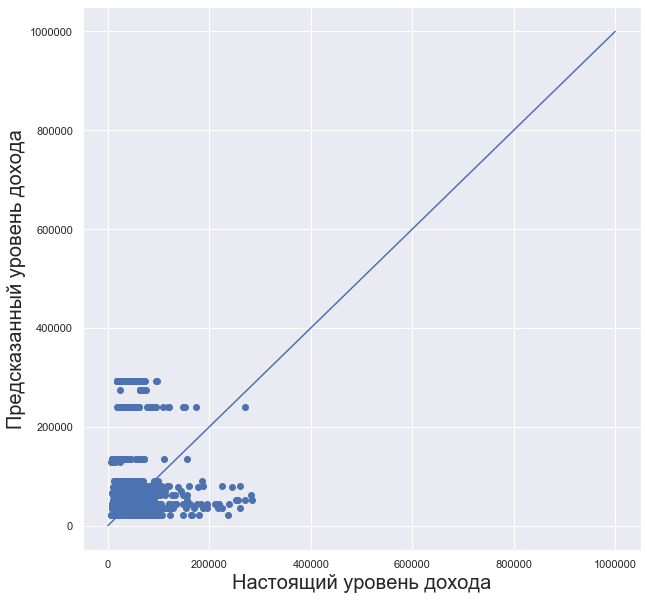

In [176]:
%matplotlib inline 
plt.figure(figsize=(10, 10))
plt.scatter(y_test, test_predictions_logistic_regression) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 10**6], [0, 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящий уровень дохода', fontsize=20)
plt.ylabel('Предсказанный уровень дохода', fontsize=20);

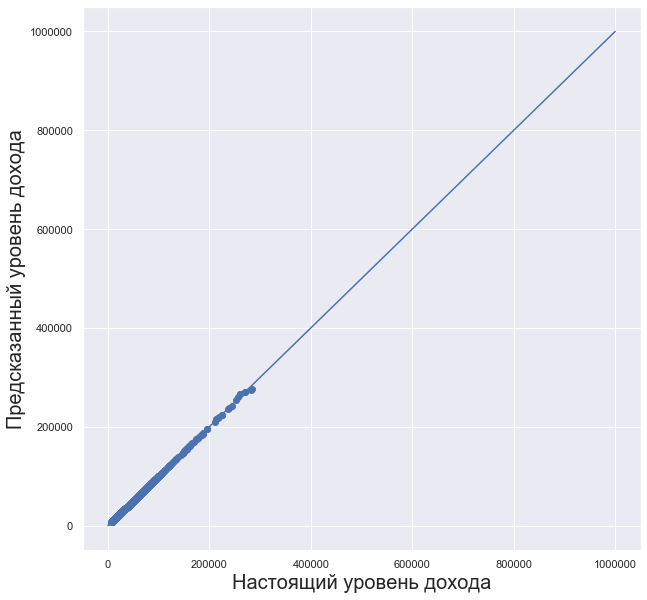

In [178]:
%matplotlib inline 
plt.figure(figsize=(10, 10))
plt.scatter(y_test, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 10**6], [0, 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящий уровень дохода', fontsize=20)
plt.ylabel('Предсказанный уровень дохода', fontsize=20);

In [191]:
import numpy as np
random_forest_model.feature_importances_
import scipy.io as io
X_train.keys()
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
feature_importance['Название признака'] = df.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_
feature_importance.sort_values(by='Важность признака', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [192]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_predictions_logistic_regression))
print(accuracy_score(y_test, np.zeros_like(y_test)))

0.0012437810945273632


In [165]:
pd.value_counts(test_predictions_logistic_regression)

21750     1302
34800      636
43500      278
80000      201
135720     128
78300      118
60900      112
69600       81
239142      72
65262       69
52200       67
293376      61
90000       58
44259       14
129027      11
274205       8
dtype: int64

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
reg_confusion_matrix = confusion_matrix(y_test, test_predictions_logistic_regression)
reg_confusion_matrix = pd.DataFrame(reg_confusion_matrix)

reg_confusion_matrix

,0,1,2,3,4,5,6,7,8,9,...,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
test_probabilities = logistic_regression_model.predict_proba(X_test)

In [34]:
test_probabilities_forest = random_forest_model.predict_proba(X_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [188]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score # метрики качества
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)

ValueError: multiclass format is not supported

In [202]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_predictions_logistic_regression))
print(accuracy_score(y_test, test_predictions_random_forest))
print(accuracy_score(y_test, np.zeros_like(y_test)))

0.0012437810945273632


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [203]:
from sklearn.metrics import confusion_matrix
random_forest_confusion_matrix = confusion_matrix(y_test, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(random_forest_confusion_matrix)
random_forest_confusion_matrix

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized_test = scaler.fit_transform(X_test)
test_probabilities_forest = random_forest_model.predict_proba(data_normalized_test)
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities_forest)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

Так как регрессионная модель фактически не сработала, исключим все текстовые переменные и построим модель только на цифровых значениях.

In [195]:
df_numeric=df.drop(text_features, axis=1)
y = df_numeric['ConfirmedMonthlyIncome']
X_train_numeric, X_test_numeric, y_train_numeric, y_test_numeric = train_test_split(dummies.values, y, test_size=0.3,
                                                          random_state=17)

In [199]:
logistic_regression_model.fit(X_train_numeric, y_train_numeric)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
test_predictions_logistic_regression = logistic_regression_model.predict(X_test_numeric)
test_predictions_logistic_regression

array([21750, 21750, 34800, ..., 21750, 34800, 34800], dtype=int64)

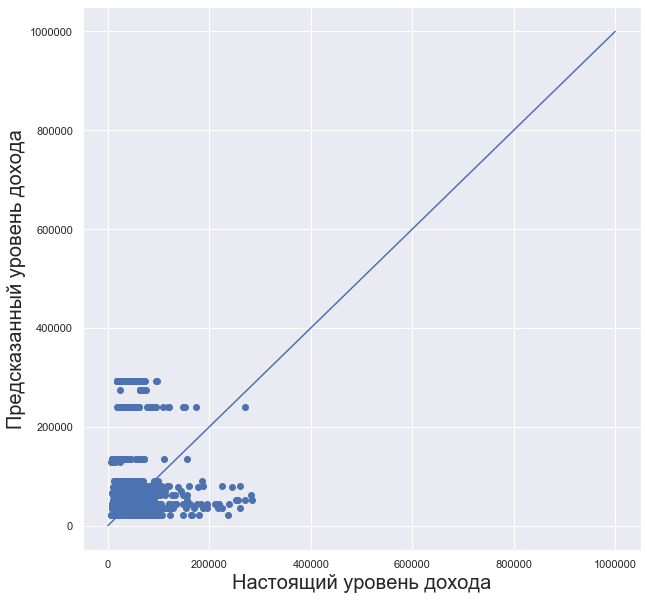

In [201]:
%matplotlib inline 
plt.figure(figsize=(10, 10))
plt.scatter(y_test, test_predictions_logistic_regression) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 10**6], [0, 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящий уровень дохода', fontsize=20)
plt.ylabel('Предсказанный уровень дохода', fontsize=20);